In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [49]:
dfrk = pd.read_csv('times/RK_times_20.csv')#,index=False)
dfieu = pd.read_csv('times/IEU_times_20.csv')#,index=False)
dfme = pd.read_csv('times/ME_times_20.csv')#,index=False)
dfimu = pd.read_csv('times/IMU_times_20.csv')#,index=False)
dfkry = pd.read_csv('times/KRY_times_20.csv')#,index=False)

In [50]:
def filter_dataframe(df):
    T,S = [],[]

    for li in df.columns:
        t = df[li].to_numpy()
        s = int(li.split('=')[-1])

        T.append(t)
        S.append(s*np.ones(t.size))

    T,S = np.array(T).reshape(-1),np.array(S).reshape(-1)
    return T,S


In [51]:
T_ieu,S_ieu = filter_dataframe(dfieu)

In [52]:
T_rk,S_rk = filter_dataframe(dfrk)

In [53]:
T_me,S_me = filter_dataframe(dfme)

In [54]:
T_imu,S_imu = filter_dataframe(dfimu)
T_imu[-5:]

array([17.20512843, 17.1130476 , 17.28232813, 17.34528971, 17.01675367])

In [55]:
T_kry,S_kry = filter_dataframe(dfkry)
T_kry[-5:]

array([15.30801702, 14.84521651, 14.85596967, 14.69150996, 15.13635063])

In [56]:
from scipy.optimize import curve_fit

x_pred = np.exp(np.linspace(np.log(S_imu.min()),np.log(S_imu.max()),41))


In [57]:
def line(x,a,b):
    return a*x+b

def latex_consist(sci_notation):
    mantissa, exponent = ('{:.2e}'.format(sci_notation)).split('e')
    return r'{} \times 10^{{ {} }}'.format(mantissa,exponent)

def equation(popt):
    return '    $t_W =  {} N^{{ {} }}$'.format(latex_consist(np.exp(popt[1])),popt[0].round(1))

In [58]:
popt_ieu, pcov_ieu = curve_fit(line, np.log(S_ieu), np.log(T_ieu))
popt_rk, pcov_rk = curve_fit(line, np.log(S_rk), np.log(T_rk))
popt_me, pcov_me = curve_fit(line, np.log(S_me), np.log(T_me))
popt_imu, pcov_imu = curve_fit(line, np.log(S_imu), np.log(T_imu))
popt_kry, pcov_kry = curve_fit(line, np.log(S_kry), np.log(T_kry))

lx_pred = np.log(x_pred)
y_ieu = np.exp(line(lx_pred,*popt_ieu))
y_rk = np.exp(line(lx_pred,*popt_rk))
y_me = np.exp(line(lx_pred,*popt_me))
y_imu = np.exp(line(lx_pred,*popt_imu))
y_kry = np.exp(line(lx_pred,*popt_kry))

In [59]:
popt_rk,popt_rk,equation(popt_imu)

(array([  2.01550286, -11.12126543]),
 array([  2.01550286, -11.12126543]),
 '    $t_W =  2.21 \\times 10^{ -05 } N^{ 1.8 }$')

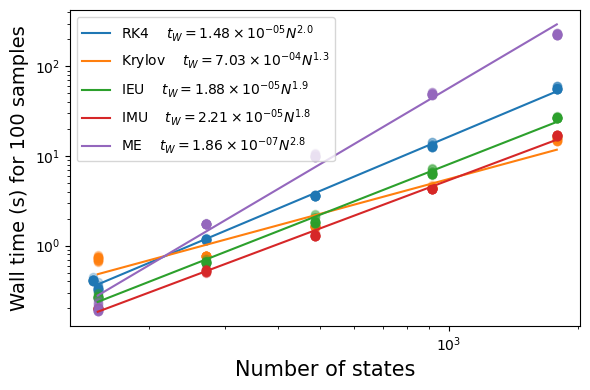

In [60]:
fig = plt.figure(figsize=(6,4))
#plt.scatter(S_me,T_me,alpha=.25)

plt.scatter(S_rk,T_rk,alpha=.25)
plt.plot(x_pred,y_rk,label='RK4'+equation(popt_rk))
plt.scatter(S_kry,T_kry,alpha=.25)
plt.plot(x_pred,y_kry,label='Krylov'+equation(popt_kry))
plt.scatter(S_ieu,T_ieu,alpha=.25)
plt.plot(x_pred,y_ieu,label='IEU'+equation(popt_ieu))
plt.scatter(S_imu,T_imu,alpha=.25)
plt.plot(x_pred,y_imu,label='IMU'+equation(popt_imu))

plt.scatter(S_me,T_me,alpha=.25)
plt.plot(x_pred,y_me,label='ME'+equation(popt_me))


plt.xscale("log")
plt.yscale("log")
plt.ylabel('Wall time (s) for 100 samples',size=14)
plt.xlabel('Number of states',size=15)
plt.legend()
plt.tight_layout()
plt.savefig('Fig-scaling.png',dpi=600)

In [61]:
df2rk = pd.read_csv('times/2S_RK_times_20.csv')

In [62]:
T_2srk,S_2srk = filter_dataframe(df2rk)

In [63]:
popt_2srk, pcov_2srk = curve_fit(line, np.log(S_2srk), np.log(T_2srk))

In [64]:
df2ieu = pd.read_csv('times/2S_IEU_times_20.csv')

In [65]:
T_2sieu,S_2sieu = filter_dataframe(df2ieu)

In [66]:
popt_2sieu, pcov_2sieu= curve_fit(line, np.log(S_2sieu), np.log(T_2sieu))

In [67]:
popt_2srk,popt_2sieu

(array([  1.95829875, -11.03945564]), array([  1.90274207, -10.9267954 ]))

In [68]:
df2imu = pd.read_csv('times/2S_IMU_times_20.csv')

In [69]:
T_2simu,S_2simu = filter_dataframe(df2imu)

In [70]:
popt_2simu, pcov_2simu= curve_fit(line, np.log(S_2simu), np.log(T_2simu))

In [71]:
popt_2srk,popt_2simu

(array([  1.95829875, -11.03945564]), array([  1.86475284, -11.07417434]))

In [72]:
df2kry = pd.read_csv('times/2S_KRY_times_20.csv')

In [73]:
T_2skry,S_2skry = filter_dataframe(df2kry)

In [74]:
popt_2skry, pcov_2skry= curve_fit(line, np.log(S_2skry), np.log(T_2skry))

In [75]:
popt_2skry,popt_2skry

(array([ 1.61216832, -8.95386616]), array([ 1.61216832, -8.95386616]))

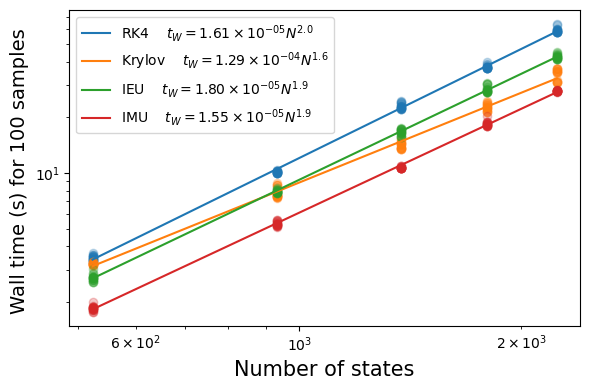

In [77]:
fig = plt.figure(figsize=(6,4))
x_2spred = np.exp(np.linspace(np.log(S_2srk.min()),np.log(S_2srk.max()),41))
y_2srk = np.exp(line(np.log(x_2spred),*popt_2srk))

plt.scatter(S_2srk,T_2srk,alpha=.25)
plt.plot(x_2spred,y_2srk,label='RK4'+equation(popt_2srk))

x_2spred = np.exp(np.linspace(np.log(S_2skry.min()),np.log(S_2skry.max()),41))
y_2skry = np.exp(line(np.log(x_2spred),*popt_2skry))

plt.scatter(S_2skry,T_2skry,alpha=.25)
plt.plot(x_2spred,y_2skry,label='Krylov'+equation(popt_2skry))

x_2spred = np.exp(np.linspace(np.log(S_2sieu.min()),np.log(S_2sieu.max()),41))
y_2sieu = np.exp(line(np.log(x_2spred),*popt_2sieu))

plt.scatter(S_2sieu,T_2sieu,alpha=.25)
plt.plot(x_2spred,y_2sieu,label='IEU'+equation(popt_2sieu))

x_2spred = np.exp(np.linspace(np.log(S_2simu.min()),np.log(S_2simu.max()),41))
y_2simu = np.exp(line(np.log(x_2spred),*popt_2simu))

plt.scatter(S_2simu,T_2simu,alpha=.25)
plt.plot(x_2spred,y_2simu,label='IMU'+equation(popt_2simu))



plt.xscale("log")
plt.yscale("log")
plt.ylabel('Wall time (s) for 100 samples ',size=14)
plt.xlabel('Number of states', size=15)
plt.legend()
plt.tight_layout()
plt.savefig('Fig-scaling-2S.png',dpi=600)

In [78]:
def solve(rate):
    log_pf = (-rate) #poisson factor log
    pf_cum = np.exp(log_pf)
    lim = rate+6*np.sqrt(rate)
    for k in np.arange(1,lim):
        log_pf  += np.log(rate/k)
        pf = np.exp(log_pf)
        pf_cum += pf
    return (1.0-pf_cum)



In [79]:
[solve(r) for r in np.arange(1,10000,100)]

[8.324114928814907e-05,
 1.4447209428780639e-08,
 6.898149162992695e-09,
 5.130904812133963e-09,
 4.293386202114391e-09,
 3.880801680011814e-09,
 3.3294849099974044e-09,
 3.606837717384792e-09,
 3.313150753747607e-09,
 2.7215524278645375e-09,
 2.95689217555406e-09,
 2.484654371137651e-09,
 2.753053451876042e-09,
 2.4446071833494898e-09,
 2.4302181378388354e-09,
 2.3192411324757245e-09,
 2.1423269824794033e-09,
 2.211040572852596e-09,
 2.214380900866786e-09,
 2.1621622270373564e-09,
 2.0684781665281093e-09,
 1.9384691629653616e-09,
 2.0241329723447166e-09,
 2.0732425776159857e-09,
 2.0882605644700902e-09,
 1.845530506194848e-09,
 2.0351795804174344e-09,
 1.9672191653441473e-09,
 1.889725265158404e-09,
 1.7872978652633265e-09,
 1.872203059249955e-09,
 1.7492316484180037e-09,
 1.7978910582527874e-09,
 1.8255461586846877e-09,
 1.8505789123324234e-09,
 1.6740352437594197e-09,
 1.6699401861330898e-09,
 1.6528010071681365e-09,
 1.785178671553922e-09,
 1.7433000598643389e-09,
 1.69890079781964

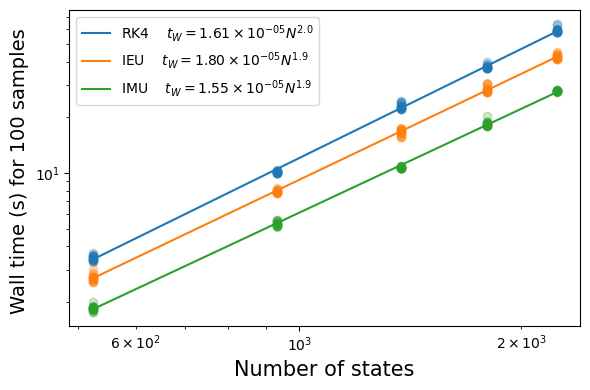

In [80]:
fig = plt.figure(figsize=(6,4))
x_2spred = np.exp(np.linspace(np.log(S_2srk.min()),np.log(S_2srk.max()),41))
y_2srk = np.exp(line(np.log(x_2spred),*popt_2srk))

plt.scatter(S_2srk,T_2srk,alpha=.25)
plt.plot(x_2spred,y_2srk,label='RK4'+equation(popt_2srk))

x_2spred = np.exp(np.linspace(np.log(S_2sieu.min()),np.log(S_2sieu.max()),41))
y_2sieu = np.exp(line(np.log(x_2spred),*popt_2sieu))

plt.scatter(S_2sieu,T_2sieu,alpha=.25)
plt.plot(x_2spred,y_2sieu,label='IEU'+equation(popt_2sieu))

x_2spred = np.exp(np.linspace(np.log(S_2simu.min()),np.log(S_2simu.max()),41))
y_2simu = np.exp(line(np.log(x_2spred),*popt_2simu))

plt.scatter(S_2simu,T_2simu,alpha=.25)
plt.plot(x_2spred,y_2simu,label='IMU'+equation(popt_2simu))



plt.xscale("log")
plt.yscale("log")
plt.ylabel('Wall time (s) for 100 samples ',size=14)
plt.xlabel('Number of states', size=15)
plt.legend()
plt.tight_layout()
plt.savefig('IEU-scaling-2S.png',dpi=600)

In [81]:
y_imu

array([ 0.18319154,  0.2045953 ,  0.22849984,  0.25519735,  0.28501414,
        0.31831467,  0.35550597,  0.39704264,  0.44343237,  0.4952422 ,
        0.55310539,  0.61772921,  0.68990356,  0.77051063,  0.86053568,
        0.9610791 ,  1.07336982,  1.19878038,  1.33884369,  1.49527173,
        1.66997654,  1.86509355,  2.08300766,  2.32638246,  2.59819273,
        2.90176081,  3.24079723,  3.61944604,  4.04233549,  4.51463457,
        5.0421162 ,  5.63122783,  6.28917018,  7.0239853 ,  7.84465488,
        8.76121   ,  9.78485373, 10.92809812, 12.20491709, 13.63091726,
       15.22352867])

In [82]:
y_kry

array([ 0.48092742,  0.52096048,  0.56432594,  0.61130121,  0.66218676,
        0.71730809,  0.7770178 ,  0.84169783,  0.91176191,  0.98765822,
        1.06987224,  1.15892988,  1.25540079,  1.35990207,  1.47310219,
        1.59572523,  1.72855559,  1.87244293,  2.02830764,  2.19714675,
        2.38004026,  2.57815807,  2.79276749,  3.02524128,  3.27706652,
        3.54985403,  3.84534874,  4.16544084,  4.51217785,  4.88777772,
        5.29464304,  5.73537639,  6.21279698,  6.72995872,  7.29016972,
        7.89701344,  8.55437167,  9.2664493 , 10.03780124, 10.87336158,
       11.77847511])

In [83]:
S_kry,T_kry

(array([ 152.,  152.,  152.,  152.,  152.,  152.,  152.,  152.,  152.,
         152.,  152.,  152.,  152.,  152.,  152.,  152.,  152.,  152.,
         152.,  272.,  272.,  272.,  272.,  272.,  272.,  272.,  272.,
         272.,  272.,  272.,  272.,  272.,  272.,  272.,  272.,  272.,
         272.,  272.,  488.,  488.,  488.,  488.,  488.,  488.,  488.,
         488.,  488.,  488.,  488.,  488.,  488.,  488.,  488.,  488.,
         488.,  488.,  488.,  914.,  914.,  914.,  914.,  914.,  914.,
         914.,  914.,  914.,  914.,  914.,  914.,  914.,  914.,  914.,
         914.,  914.,  914.,  914., 1782., 1782., 1782., 1782., 1782.,
        1782., 1782., 1782., 1782., 1782., 1782., 1782., 1782., 1782.,
        1782., 1782., 1782., 1782., 1782.]),
 array([ 0.74145031,  0.77977133,  0.74337792,  0.74479818,  0.70635748,
         0.72053742,  0.74072981,  0.73803306,  0.7197845 ,  0.72422004,
         0.69376969,  0.76230264,  0.73459363,  0.69624591,  0.69875503,
         0.69623494,  0.67

In [84]:
S_kry,T_imu

(array([ 152.,  152.,  152.,  152.,  152.,  152.,  152.,  152.,  152.,
         152.,  152.,  152.,  152.,  152.,  152.,  152.,  152.,  152.,
         152.,  272.,  272.,  272.,  272.,  272.,  272.,  272.,  272.,
         272.,  272.,  272.,  272.,  272.,  272.,  272.,  272.,  272.,
         272.,  272.,  488.,  488.,  488.,  488.,  488.,  488.,  488.,
         488.,  488.,  488.,  488.,  488.,  488.,  488.,  488.,  488.,
         488.,  488.,  488.,  914.,  914.,  914.,  914.,  914.,  914.,
         914.,  914.,  914.,  914.,  914.,  914.,  914.,  914.,  914.,
         914.,  914.,  914.,  914., 1782., 1782., 1782., 1782., 1782.,
        1782., 1782., 1782., 1782., 1782., 1782., 1782., 1782., 1782.,
        1782., 1782., 1782., 1782., 1782.]),
 array([ 0.19882774,  0.20172882,  0.19783235,  0.19797182,  0.19916534,
         0.19725394,  0.20186353,  0.19876456,  0.19851923,  0.2037909 ,
         0.19955182,  0.19857311,  0.20033169,  0.19977593,  0.20041919,
         0.19980621,  0.19

In [85]:
10**np.linspace(2,3,5)

array([ 100.        ,  177.827941  ,  316.22776602,  562.34132519,
       1000.        ])

In [86]:
np.linspace(2,3,5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [87]:
dfSTS = pd.read_csv('times/STS_IMU_times_20.csv')
T_imu,S_imu = filter_dataframe(dfSTS)
popt_imu, pcov_imu= curve_fit(line, np.log(S_imu), np.log(T_imu))

x_pred = np.exp(np.linspace(np.log(S_imu.min()),np.log(S_imu.max()),41))
y_imu = np.exp(line(np.log(x_pred),*popt_imu))

dfSTS = pd.read_csv('times/STS_RK_times_20.csv')
T_rk,S_rk = filter_dataframe(dfSTS)
popt_rk, pcov_rk= curve_fit(line, np.log(S_rk), np.log(T_rk))

#x_pred = np.exp(np.linspace(np.log(S_rk.min()),np.log(S_rk.max()),41))
y_rk = np.exp(line(np.log(x_pred),*popt_rk))

dfSTS = pd.read_csv('times/STS_KRY_times_20.csv')
T_kry,S_kry = filter_dataframe(dfSTS)
popt_kry, pcov_kry= curve_fit(line, np.log(S_kry), np.log(T_kry))

y_kry = np.exp(line(np.log(x_pred),*popt_kry))

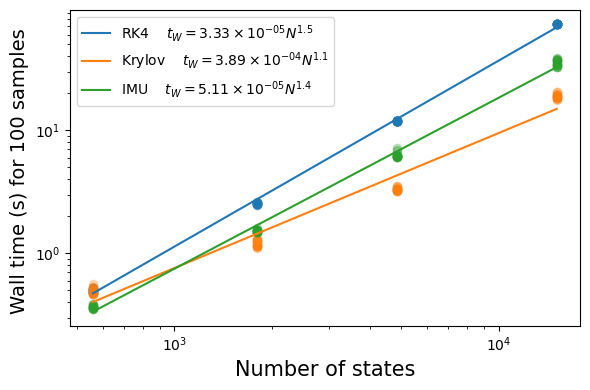

In [88]:
fig = plt.figure(figsize=(6,4))


plt.scatter(S_rk,T_rk,alpha=.25)
plt.plot(x_pred,y_rk,label='RK4'+equation(popt_rk))

plt.scatter(S_kry,T_kry,alpha=.25)
plt.plot(x_pred,y_kry,label='Krylov'+equation(popt_kry))


plt.scatter(S_imu,T_imu,alpha=.25)
plt.plot(x_pred,y_imu,label='IMU'+equation(popt_imu))

plt.xscale("log")
plt.yscale("log")
plt.ylabel('Wall time (s) for 100 samples ',size=14)
plt.xlabel('Number of states', size=15)
plt.legend()
plt.tight_layout()
plt.savefig('Fig-scaling-STS.png',dpi=600)